## Exploring `DALL-E` models with `OpenAI` API

Other than LLMs, OpenAI is also known for Image and Audio models (DALL-2, Whisper). In this notebook DALL-E is being explored, how images can be generated, what prompts to use, etc...

OpenAI docs: https://platform.openai.com/docs/guides/images

After experimentation DALL-E does not seem so amazing

DALL-E's disadvantages
- low quality images
- incorrect prompt understanding
- aspect ratio must be 1:1
- maskes need to be carefully handcrafted

Midjourney and Stable Diffusion shall serve as better options

In [1]:
import credentials
import os
os.environ["OPENAI_API_KEY"] = credentials.openai_api

from PIL import Image
import requests
from io import BytesIO

import openai

### Generate simple images based on prompt

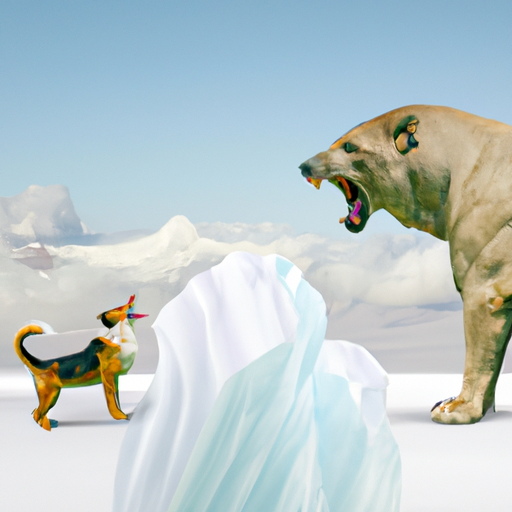

In [6]:
response = openai.Image.create(
  prompt="a small dog barking at a large lion on an iceberg",
  n=1,
  size="512x512"
)

image_url = response['data'][0]['url']
img_response = requests.get(image_url)
img = Image.open(BytesIO(img_response.content))

img

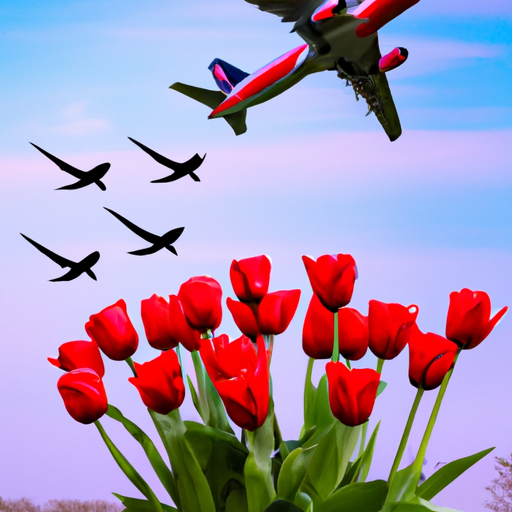

In [7]:
response = openai.Image.create(
  prompt="a flock of birds flying over a vase of red tulips while a jumbo-jet flies on the sky in the background",
  n=1,
  size="512x512"
)

image_url = response['data'][0]['url']
img_response = requests.get(image_url)
img = Image.open(BytesIO(img_response.content))

img

### Generate image edits (mask + prompt)

For this an original image, and a masked variation are required. These have to be prepared in advance

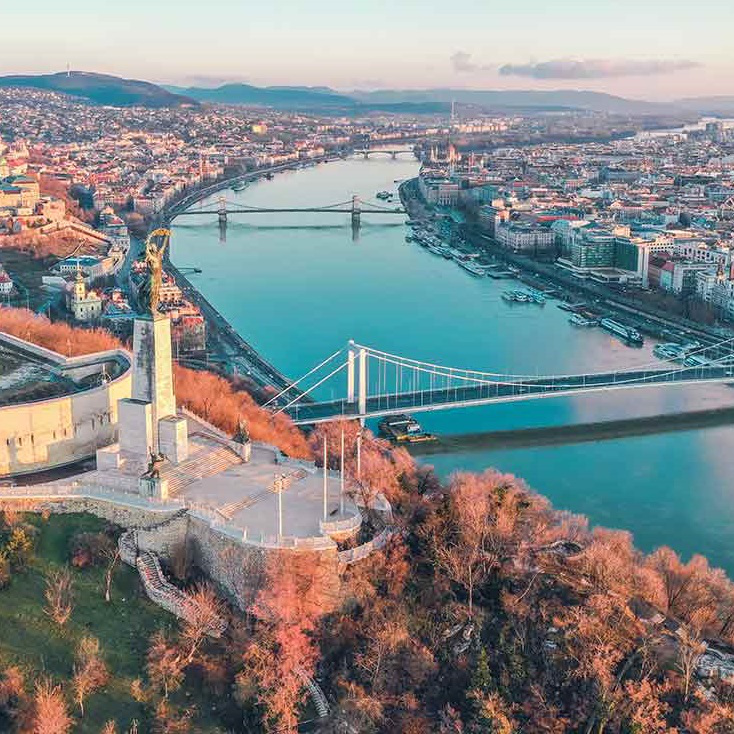

In [3]:
Image.open('../docs/images/budapest.png')

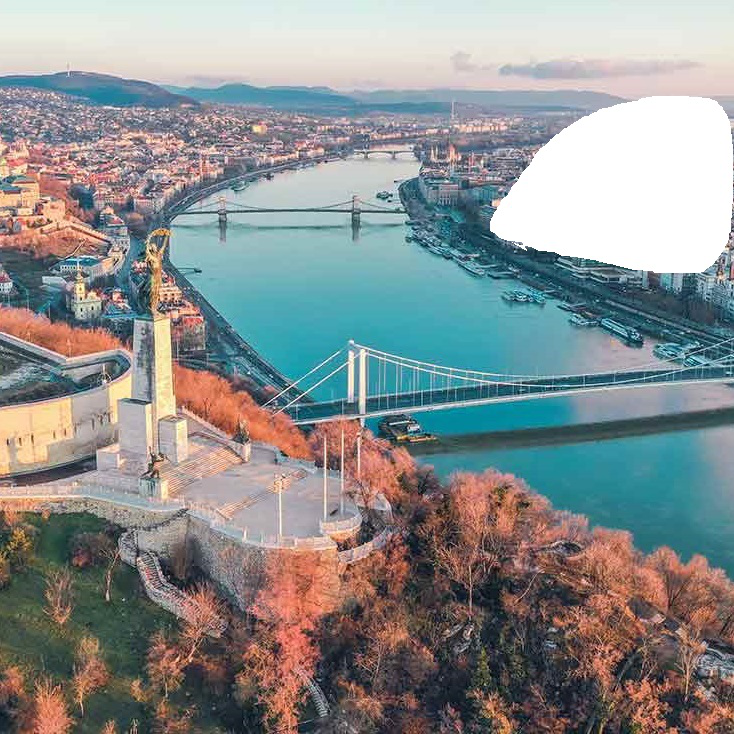

In [4]:
Image.open('../docs/images/budapest_masked_transparent.png')

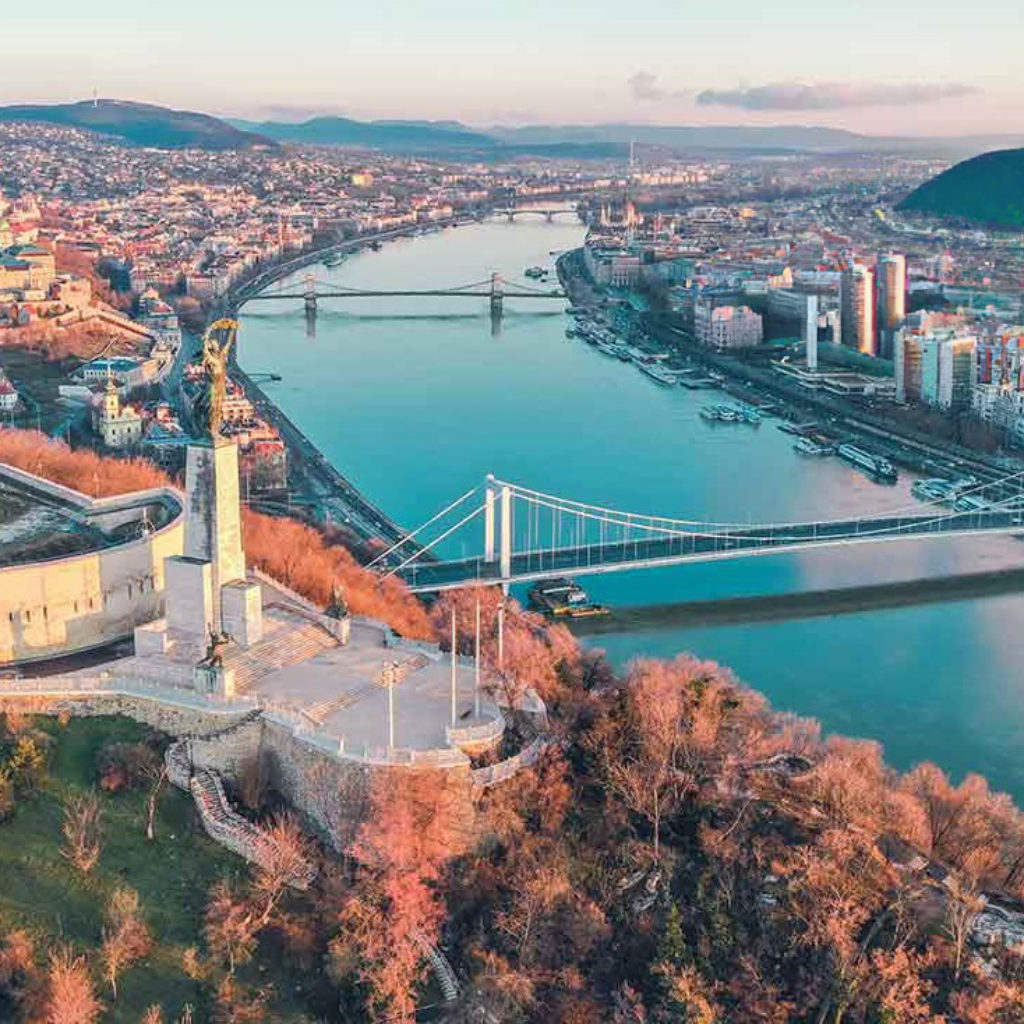

In [16]:
response = openai.Image.create_edit(
  image=open("../docs/images/budapest.png", "rb"),
  mask=open("../docs/images/budapest_masked_transparent.png", "rb"),
  prompt="New York City, Manhattan downtown district with many tall buildings and skyscrapers",
  n=1,
  size="1024x1024"
)

image_url = response['data'][0]['url']
img_response = requests.get(image_url)
img = Image.open(BytesIO(img_response.content))

img

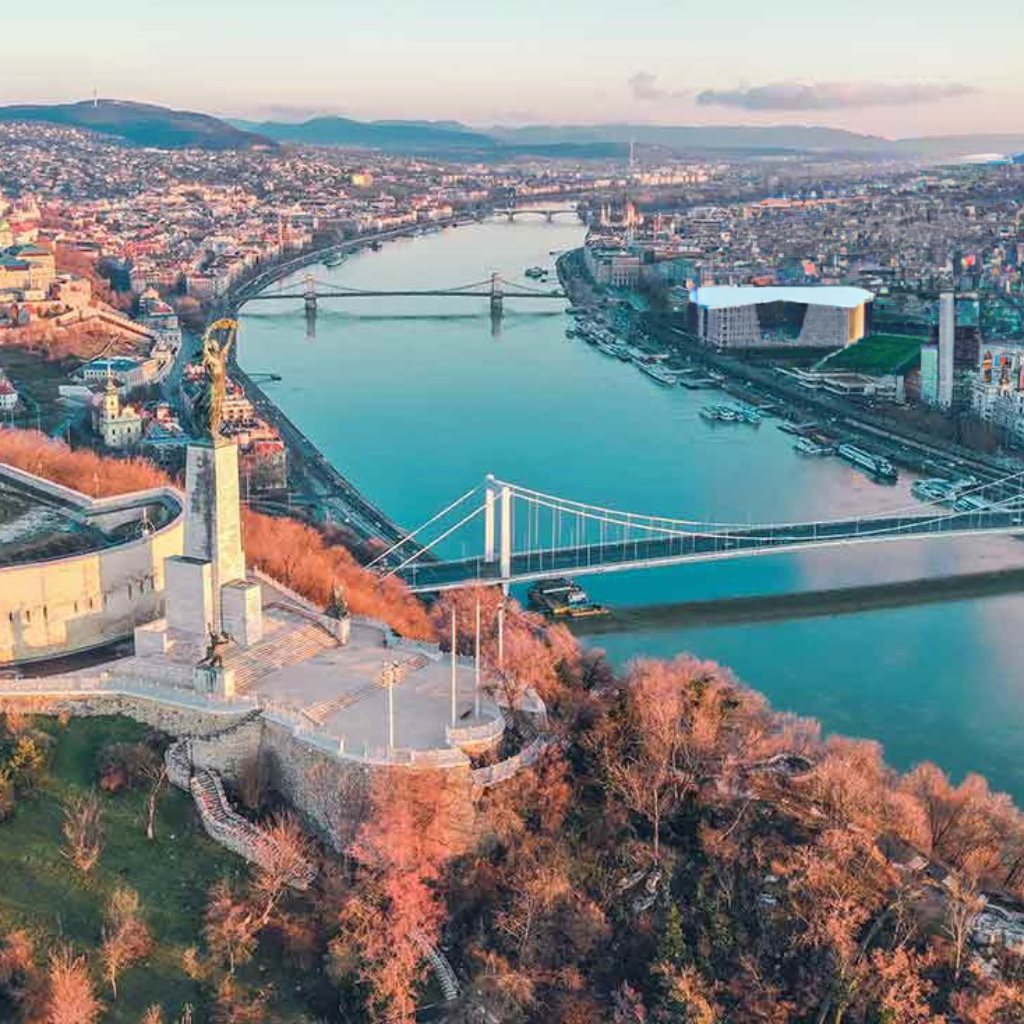

In [22]:
response = openai.Image.create_edit(
  image=open("../docs/images/budapest.png", "rb"),
  mask=open("../docs/images/budapest_masked_transparent.png", "rb"),
  prompt="a huge football stadiums in the city",
  n=1,
  size="1024x1024"
)

image_url = response['data'][0]['url']
img_response = requests.get(image_url)
img = Image.open(BytesIO(img_response.content))

img